In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Analysis

* Reading in the dataset `car_prices.csv`.
* Running the info and describing DataFrame methods to understand the data.

In [20]:
cars = pd.read_csv("car_prices.csv", on_bad_lines='skip')
cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [21]:
cars.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [22]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


# Data cleaning

In [23]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [24]:
cars.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [25]:
cars = cars.dropna()
cars['make']

0            Kia
1            Kia
2            BMW
3          Volvo
4            BMW
           ...  
558805       BMW
558807       Ram
558808       BMW
558809    Nissan
558810      Ford
Name: make, Length: 472336, dtype: object

In [26]:
cars.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [27]:
cars = cars.rename(columns={'mmr': 'estimatedprice'})
cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,estimatedprice,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# Highest selling Cars

In [28]:
cars["make"].value_counts()

make
Ford             81014
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27183
Honda            24781
Hyundai          18663
BMW              17509
Kia              15830
Chrysler         15135
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley            105
Aston 

# Average price by condition

* Bining the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Using pd.cut() to create the bins.

* Building a barplot of the average price by condition bin.

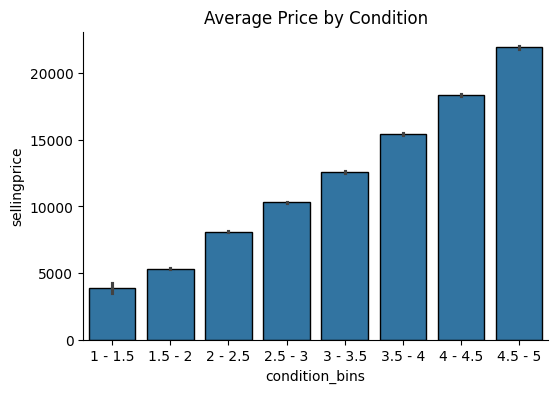

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

bins = np.linspace(1, 5, 9)
labels = ["1 - 1.5", "1.5 - 2", "2 - 2.5", "2.5 - 3", "3 - 3.5", "3.5 - 4", "4 - 4.5", "4.5 - 5"]

cars["condition_bins"] = pd.cut(cars["condition"], bins=bins, labels=labels)

sns.barplot(
    x="condition_bins",
    y="sellingprice",
    data=cars,
    edgecolor='black'
)

ax.set_title("Average Price by Condition")

sns.despine()

# Average Price by make and condition

* Creating a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table are the average selling price for each make/condition combination.

* Now creating the table, building a heatmap from the data.

In [30]:
top10 = cars["make"].value_counts().iloc[:10].index

avgs = (cars
        .loc[cars["make"].isin(top10)]
        .pivot_table(index="make", 
                     columns="condition_bins", 
                     values={"sellingprice": "mean"}
                    )
        .droplevel(0, axis=1)
       )

avgs.head()

condition_bins,1 - 1.5,1.5 - 2,2 - 2.5,2.5 - 3,3 - 3.5,3.5 - 4,4 - 4.5,4.5 - 5
make,,,,,,,,
BMW,4115.000000,6611.865879,9880.908720,12264.377248,15962.956409,21416.257934,28713.125909,35498.852529
Chevrolet,3060.416667,5247.223029,7332.376426,10217.360516,11497.055365,14348.542640,16651.148581,21576.319685
Chrysler,2409.375000,4161.863329,5177.616225,8774.190278,9106.527871,14571.922061,14589.911725,16614.611632
Dodge,4226.562500,5252.853274,7045.332552,9732.828118,10465.962071,13857.293987,14498.251955,17326.590258
Ford,4340.819672,5507.984534,8760.564233,11132.280026,13457.470273,15360.637517,17763.322179,20612.232978


<Axes: title={'center': 'Average Selling Price by Make and Quality'}, xlabel='condition_bins', ylabel='make'>

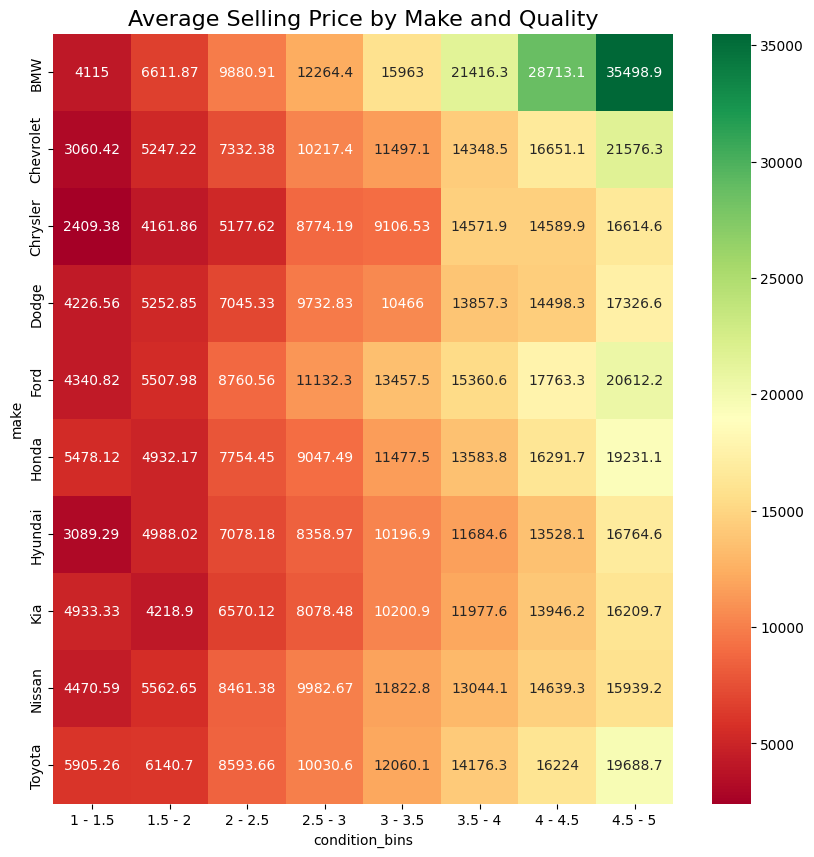

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))


plt.title("Average Selling Price by Make and Quality", fontsize=16)

sns.heatmap(
    avgs,
    annot=True,
    cmap="RdYlGn",
    fmt="g"
)


- We are mostly interested in purchasing highest selling car, specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filtering the data down to rows where `model` is "F-150".
* Then building a histogram of sellingprice with 10 bins. 

In [32]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,estimatedprice,sellingprice,saledate,condition_bins
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5 - 5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5 - 4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3 - 3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4 - 4.5
1950,2011,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1cf3bke02634,ca,3.5,62174.0,silver,black,"ford motor credit company,llc",19750,20900,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3 - 3.5


<Axes: xlabel='sellingprice', ylabel='Count'>

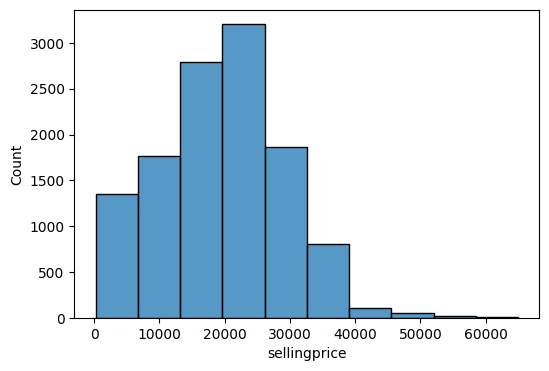

In [33]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(x="sellingprice",
            bins=10,
            data=f150s,
            edgecolor='black'
            )


* Building a barplot of `sellingprice` by `trim` for the F150s.

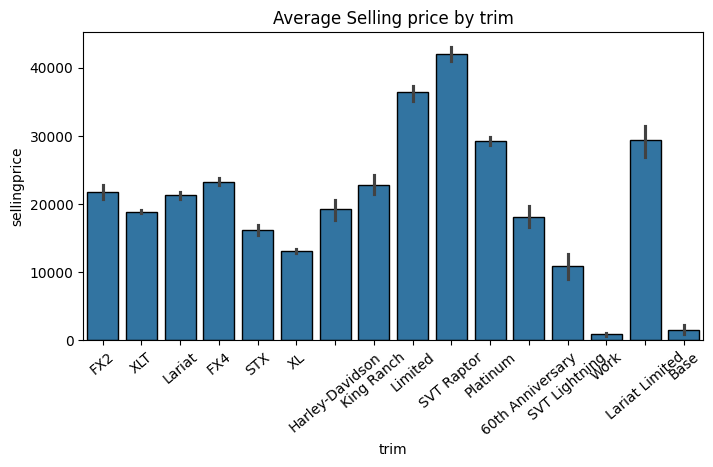

In [34]:
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(x="trim", y="sellingprice", data=f150s, edgecolor='black')

plt.xticks(rotation=40)

plt.title('Average Selling price by trim')
plt.show()

* Filtering the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, building a jointplot of `condition` (not binned) by `sellingprice`.

### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to the cars we want to purchase.

* Which color sells for more than the recommended price?

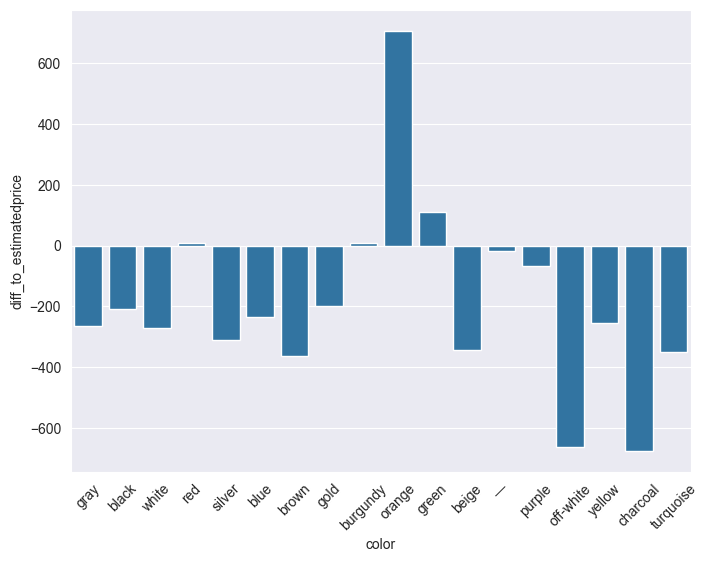

In [35]:
sns.set_style("darkgrid")

f150s = f150s.assign(diff_to_estimatedprice = f150s["sellingprice"] - f150s["estimatedprice"])

fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(
    x="color",
    y="diff_to_estimatedprice",
    data=f150s,
    errorbar=None
)

plt.xticks(rotation=45)

plt.show()

In [36]:
f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,estimatedprice,sellingprice,saledate,condition_bins,diff_to_estimatedprice
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5 - 5,3800
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5 - 4,2500
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3 - 3.5,600
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4 - 4.5,-700
1950,2011,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1cf3bke02634,ca,3.5,62174.0,silver,black,"ford motor credit company,llc",19750,20900,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3 - 3.5,1150


* Further filtering the data to the trims. Excluding the color 'orange' and taking only trucks from years between 2009 and 2014. 

In [37]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

f150s_reduced = f150s.query("color != 'orange' and trim in @trim_list")

f150s_pivot = (
    f150s_reduced
    .loc[f150s_reduced["year"].between(2009, 2014)]
    .pivot_table(
        index="trim",
        columns="condition_bins",
        values={"sellingprice": "mean"}
    )
)

In [38]:
f150s_reduced

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,estimatedprice,sellingprice,saledate,condition_bins,diff_to_estimatedprice
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5 - 4,2500
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3 - 3.5,600
2001,2011,Ford,F-150,XL,SuperCab,automatic,1ftex1em5bfc39949,ca,3.6,91626.0,white,gray,"enterprise fleet management exchange, inc.",14800,13300,Fri Dec 26 2014 15:00:00 GMT-0800 (PST),3.5 - 4,-1500
2079,2011,Ford,F-150,XLT,SuperCab,automatic,1ftex1cm3bfd14408,ca,4.5,28696.0,black,black,robinson ford sales inc,18900,22000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4 - 4.5,3100
2107,2011,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef6bfa44290,ca,4.1,71995.0,gray,gray,fox rent a car,21000,21800,Thu Dec 18 2014 11:30:00 GMT-0800 (PST),4 - 4.5,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558336,2009,Ford,F-150,Platinum,supercrew,automatic,1ftpw12v79fb31867,tx,2.7,54475.0,gray,beige,hopper motorplex inc,23700,21500,Fri Jun 19 2015 04:00:00 GMT-0700 (PDT),2.5 - 3,-2200
558478,2013,Ford,F-150,XLT,supercrew,automatic,1ftfw1ef9dfa32931,pa,4.7,38953.0,gray,gray,usautoland inc,25300,25500,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),4.5 - 5,200
558532,2012,Ford,F-150,Platinum,supercrew,automatic,1ftfw1et8cfa00587,pa,4.1,51994.0,white,black,r hollenshead auto sales inc,31700,29400,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),4 - 4.5,-2300
558589,2007,Ford,F-150,XLT,supercab,automatic,1ftpx12v07fa11502,fl,3.0,85534.0,red,gray,onemain rem/orange county motorsports llc,9875,10400,Fri Jun 19 2015 03:20:00 GMT-0700 (PDT),2.5 - 3,525


<Axes: xlabel='None-condition_bins', ylabel='trim'>

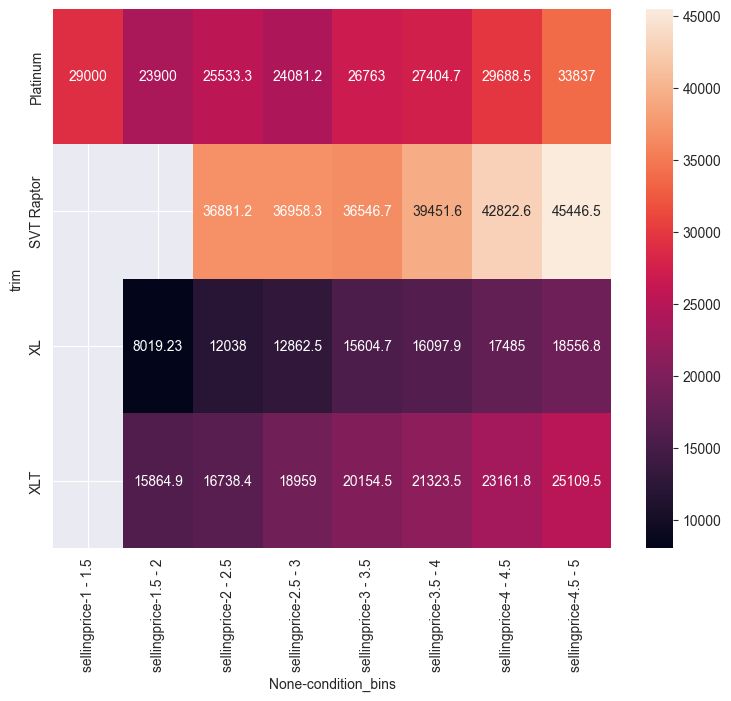

In [39]:
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(f150s_pivot, annot=True, fmt="g")

### What is best state to buy ford f-150s in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filtering out any trucks with a quality of less than 3.5. the DataFrame should only have trucks with a quality of 3.5 or greater.
* now, building a subplot with a bar chart of `state` by `diff_to_estimatedprice` and `state` by `count` to find which states sell XLT models below estimated price.

<Axes: xlabel='state', ylabel='auto_count'>

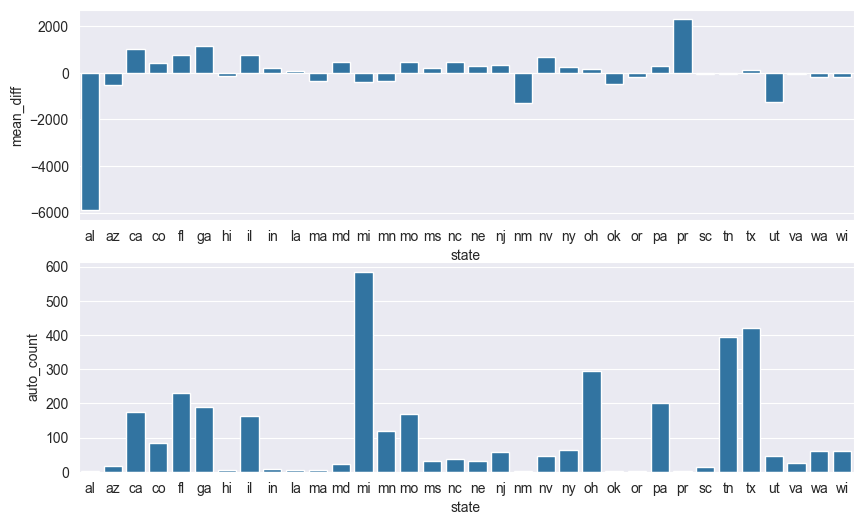

In [40]:
f150s_XLT = (f150s_reduced
             .query("trim == 'XLT' and condition >= 3.5")
             .groupby(['state'], as_index=False)
             .agg(
                 mean_diff=("diff_to_estimatedprice", 'mean'),
                 auto_count=("diff_to_estimatedprice", "count")
             )
)

fig, ax = plt.subplots(2, figsize=(10, 6))

sns.barplot(
 x="state",
 y="mean_diff",
 data = f150s_XLT,
 ax=ax[0]
)

sns.barplot(
 x="state",
 y="auto_count",
 data = f150s_XLT,
 ax=ax[1]
)


 Ok, looks like Utah, `state=='ut'` has a good amount of quantity and a low average price.

In [41]:
f150s.query("trim=='XLT' and state == 'ut' and condition > 3.5").groupby("saledate").agg({"diff_to_estimatedprice":["mean", "count"]})

diff_to_estimatedprice      
                                                          mean count
saledate                                                            
Wed Feb 04 2015 03:30:00 GMT-0800 (PST)           -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST)           -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)            -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)            -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST)           -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)            -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT)           -2400.000000     4
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)            -600.000000     5

To calculate MAPE, concise explanations and formulas for each term:

1. **SP (Selling Price)**:
   - The actual price at which a product is sold.
   - Notation: \( SP \)

2. **IB (Industry Benchmark)**:
   - The expected or standard selling price for a product as recognized in the industry.
   - Notation: \( IB \)

3. **Absolute Deviation**:
   - The absolute difference between the selling price and the industry benchmark.
   - Formula:Absolute Deviation = |SP - IB|

4. **Absolute Percentage Error**:
   - abs_error = (abs(actual - predicted) / actual) * 100.

5. **MAPE (Mean Absolute Percentage Error)**:
   - The average absolute percentage difference between the selling prices and industry benchmarks.
   -  mape = abs_error.mean()

5. **Accuracy**:
   - accuracy = 100 - mape

In [42]:
cars = cars.assign(abs_deviation=abs(cars['sellingprice'] - cars['estimatedprice']))
cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,estimatedprice,sellingprice,saledate,condition_bins,abs_deviation
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5 - 5,1000
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5 - 5,700
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),4 - 4.5,1900
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),4 - 4.5,250
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),4 - 4.5,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),3.5 - 4,2500
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),4.5 - 5,600
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),4.5 - 5,4200
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),3.5 - 4,4000


In [43]:
cars = cars.assign(abs_error=round((abs(cars['sellingprice'] - cars['estimatedprice']) / cars['sellingprice']) * 100,2))
cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,estimatedprice,sellingprice,saledate,condition_bins,abs_deviation,abs_error
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5 - 5,1000,4.65
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5 - 5,700,3.26
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),4 - 4.5,1900,6.33
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),4 - 4.5,250,0.90
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),4 - 4.5,1000,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),3.5 - 4,2500,10.96
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),4.5 - 5,600,1.95
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),4.5 - 5,4200,12.35
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),3.5 - 4,4000,36.04


In [44]:
mape = round(cars['abs_error'].mean())
mape

22

In [45]:
accuracy = 100 - mape
accuracy

78